# Modelos ARIMA, SARIMA. Diagnóstico.


por **Cibele Russo**

Baseado em 

- Moretting, P.A.; Toloi, C.M.C. “Análise de Séries Temporais”. Blucher, 2004.
- Ehlers, R.S. (2009) Análise de Séries Temporais, http://www.icmc.usp.br/~ehlers/stemp/stemp.pdf. Acessado em 28/06/2020.

Implementações:
- Brownlee, Jason. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.

Leituras adicionais:

- Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice. OTexts.

- https://otexts.com/fpp2/non-seasonal-arima.html
- https://otexts.com/fpp2/seasonal-arima.html



**Vamos fazer uma pequena revisão da aula anterior?**

Sejam

- $\tilde{Z}_t = Z_t -\mu$


- $B^m Z_t = Z_{t-m}$ (Operador translação (defasagem, backshift))


- $F^m Z_t = Z_{t+m}$ (Operador translação para o futuro (forward))


- $\Delta = (1-B)$ (Operador diferença)


- $S Z_t = (1-B)^{-1}Z_t = \Delta^{-1}Z_t$ (Operador soma)






## Modelos autorregressivos - AR(p)

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \phi_{2}\tilde{Z}_{t-2} + \ldots + \phi_{p}\tilde{Z}_{t-p} + a_{t}$$

onde $a_{t}$ é um ruído branco.

Sendo o operador autorregressivo estacionário de ordem p dado por

$$\phi(B) = 1-\phi_1 B-\phi_2 B^2-\ldots -\phi_p B^p,$$

podemos reescrever o modelo AR(p) como

$$\phi(B)\tilde{Z}_{t} =  a_{t}$$


## Modelos de médias móveis - MA(q)

$$\tilde{Z}_{t} =  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

$$\tilde{Z}_{t} = (1-\theta_1 B - \ldots -\theta_q B^q) a_t $$

Assim

$$\tilde{Z}_{t}=\theta(B) a_t$$

onde $\theta(B) = 1-\theta_1 B-\ldots-\theta_q B^q$ é o operador de médias móveis de ordem $q$.


## Modelos ARMA(p,q)

Os modelos ARMA(p,q) são dados na forma

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \ldots + \phi_{p}\tilde{Z}_{t-p} +  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

ou podemos reescrever

$$\phi(B)\tilde{Z}_{t} = \theta(B) a_t$$

em que 

- $\phi(B)$ é o operador autorregressivo

- $\theta(B)$ é o operador de médias móveis


# Modelos ARIMA (p,d,q)


**Componentes de um modelo ARIMA (p,d,q):**

- **AR (p)**: Componentes autorregressivas, utilizam a relação de dependência entre a observação corrente e as observações em um período prévio

- **Integrado (d)**: Diferenças para tornar a série estacionária

- **MA (q)**: Componentes de médias móveis, utilizam a dependência entre uma obervação e um erro residual de um modelo de média móvel aplicado a observações em atraso.





Considere que $Z_t$ não é estacionária mas 

$$W_t = \Delta^d Z_t$$

é uma série estacionária e utilizamos portanto um modelo ARMA(p,q) para $W_t$, ou seja,

$$\phi(B) W_t = \theta(B) a_t.$$

Se $W_t$ for uma diferença de $Z_t$, então dizemos que $Z_t$ segue um modelo autorregressivo _integrado_ de médias móveis, ou um modelo ARIMA:

$$\phi(B) \Delta^d Z_t = \theta(B) a_t$$

de ordem (p,d,q) e escrevemos ARIMA (p,d,q) em que $p$ e $q$ são as ordens de $\phi(B)$ e $\theta(B)$, respectivamente.



# Modelos SARIMA (p,d,q)x(P, D,Q)m

- **SARIMA: ARIMA com sazonalidade**


- Componente sazonal se repete a cada $m$ observações ($m>1$).


- Com dados mensais e $m=12$, tipicamente espera-se que $Z_t$ dependa de $Z_{t-12}$ e talvez $Z_{t-24}$ além de $Z_{t-1}, Z_{t-2}$, ...


- Tomar a primeira diferença $\Delta Z_t = Z_t -Z_{t-1}$ não é suficiente para tornar a
série (aproximadamente) estacionária.


- Considere as diferenças sazonais 
$$\Delta_m Z_t = (1 - B^m )Z_t = Z_t - Z_{t-m}$$
sendo $m$ o periodo da sazonalidade.


- A D-ésima diferença sazonal é denotada por $\Delta^D_m$.


- Combinando-se diferenciação simples e sazonais obtem-se o operador $\Delta^d\Delta^D_m$.


**Componentes de um modelo SARIMA (p,d,q)x(P,D,Q)m:**

- $(p,d,q)$: componentes não-sazonais
- $(P,D,Q)_m$: componentes sazonais

Aqui $m$ é o período da sazonalidade.


$$\phi(B) \Phi(B^m ) W_t = \theta(B) \Theta(B^m ) a_ t$$

onde

- $\phi(B) = (1-\alpha_1 B-\ldots \alpha_p B^p)$

- $\Phi(B^m)= (1- \phi_1 B^m-\ldots - \phi_p B^{P_m})$

- $W_t = \Delta^d \Delta^D Z_t = (1-B)^d (1-B^m)^D Z_t$

- $\theta(B) = (1+\beta_1 B + \ldots + \beta_q B^q)$

- $\Theta(B^m) = (1+\theta_1 B^m+\ldots+\theta_Q B^{Q_m})$






**Exemplo:** Série mensal com 1 diferença simples e 1 sazonal com período 12


$\begin{array}{lll}
\Delta \Delta_{12} Z_t & =& (1-B)(1-B^{12})Z_t\\
&=& (1-B-B^{12}+B^{13}) Z_t\\
&=& Z_t-Z_{t-1}-Z_{t-12}+Z_{t-13}\end{array}$


**Exemplo:** Modelo $\mbox{ SARIMA(1,0,0)}\times(0,1,1)_{12}$


$\begin{array}{rll}
(1-\phi B)(1-B^{12})Z_t &=& (1-\theta B^{12})a_t\\
Z_t &=& Z_{t-12}+\phi(Z_{t-1}-Z_{t-13})+a_t-\theta a_{t-12}\end{array}$



**Observações**

- Na prática os valores de d e D em geral não serão muito maiores do que 1 e um número pequeno de coeficientes será suficiente.

-  Especificar os valores de d e D que tornam a série (aproximadamente) estacionária e remove a maior parte da sazonalidade.

-  Os valores de p, P, q e Q devem ser especificados com base nas funções de autocorrelação e autocorrelação parcial da série diferenciada.

-  Os valores de P e Q são especificados basicamente olhando-se para as defasagens $k = m, 2m, \ldots.$ 

## Aplicação

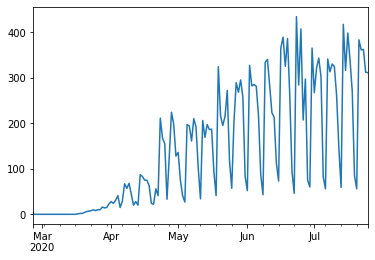

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0) 

pkgdir = '/home/cibele/CibelePython/AprendizadoDinamico/Data'

# Leitura dos dados de COVID-19 no estado de SP - vamos trabalhar com as mortes
covidSP = pd.read_csv(f'{pkgdir}/covidSP.csv', index_col='date', parse_dates=True)

idx = pd.date_range(start=covidSP.index.min(), end=covidSP.index.max(), freq='D')
covidSP = covidSP.reindex(idx)
covidSP.fillna(0,inplace=True)

covidSP['deaths'].plot()

In [2]:
covidSP.index.max()


Timestamp('2020-07-25 00:00:00', freq='D')

Vamos considerar a decomposição em sazonalidade e tendência em um modelo aditivo, nesse caso porque temos muitos zeros.

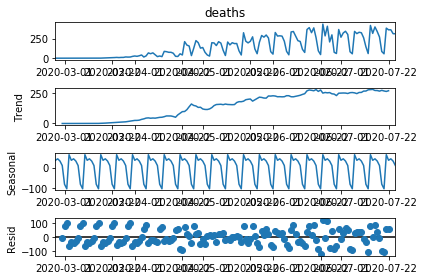

In [3]:
result = seasonal_decompose(covidSP['deaths'], model='additive')
result.plot();

Aparentemente há sazonalidade nos dados, devido à sistemática de notificações

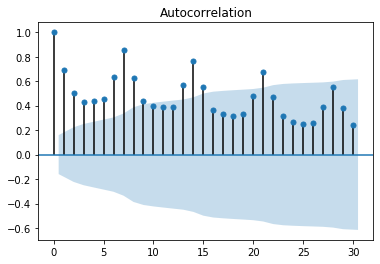

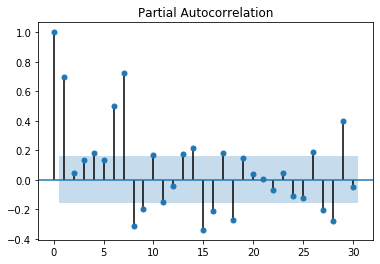

In [4]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)

# Correlograma

plot_acf(covidSP['deaths'], lags=30)
plot_pacf(covidSP['deaths'], lags=30)
plt.show()

In [5]:
# Ajuste de modelo SARIMA 

auto_arima(covidSP['deaths'],seasonal=True,m=7).summary()


stepwise_fit = auto_arima(covidSP['deaths'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(1,1,1,7) [intercept=True]; AIC=1503.140, BIC=1515.019, Time=0.202 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1546.346, BIC=1552.285, Time=0.022 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1506.697, BIC=1518.577, Time=0.217 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1504.764, BIC=1516.643, Time=0.190 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1553.312, BIC=1556.281, Time=0.010 seconds
Fit ARIMA(0,0,0)x(0,1,1,7) [intercept=True]; AIC=1505.935, BIC=1514.844, Time=0.117 seconds
Fit ARIMA(0,0,0)x(1,1,0,7) [intercept=True]; AIC=1506.823, BIC=1515.733, Time=0.296 seconds
Fit ARIMA(0,0,0)x(2,1,1,7) [intercept=True]; AIC=1501.191, BIC=1516.040, Time=0.571 seconds
Fit ARIMA(0,0,0)x(2,1,0,7) [intercept=True]; AIC=1500.211, BIC=1512.091, Time=0.373 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1497.094, BIC=1511.944, Time=0.512 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  151
Model:             SARIMAX(4, 0, 0)x(2, 1, 0, 7)   Log Likelihood                -736.359
Date:                           Tue, 28 Jul 2020   AIC                           1488.717
Time:                                   14:27:29   BIC                           1512.476
Sample:                                        0   HQIC                          1498.371
                                           - 151                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.9028      5.491      3.078      0.002       6.140      27.665
ar.L1          0.2212      0.072      3.065      0.002       0.080       0.363
ar.L2          0.1651      0.071      2.325      0.020       0.026       0.304
ar.L3         -0.2270      0.086     -2.652      0.008      -0.395      -0.059
ar.L4          0.1806      0.075      2.412      0.016       0.034       0.327
ar.S.L7       -0.6434      0.073     -8.836      0.000      -0.786      -0.501
ar.S.L14      -0.2184      0.095     -2.288      0.022      -0.406      -0.031
sigma2      1579.5096    162.146      9.741      0.000    1261.709    1897.310
===================================================================================
Ljung-Box (Q):                       31.23   Jarque-Bera (JB):                14.88
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               8.88   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
len(covidSP)

151

In [7]:
len(covidSP)*0.8

120.80000000000001

In [19]:
# Set one year for testing
treino = covidSP.iloc[:120]
teste = covidSP.iloc[120:]

In [20]:
modelo = SARIMAX(treino['deaths'],order=(4,0,0),seasonal_order=(2,1,0,7))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            deaths   No. Observations:                  120
Model:             SARIMAX(4, 0, 0)x(2, 1, 0, 7)   Log Likelihood                -579.563
Date:                           Tue, 28 Jul 2020   AIC                           1173.126
Time:                                   14:28:28   BIC                           1192.218
Sample:                               02-26-2020   HQIC                          1180.874
                                    - 06-24-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4488      0.086      5.195      0.000       0.279       0.618
ar.L2          0.0923      0.095      0.969      0.332      -0.094       0.279
ar.L3         -0.1258      0.114     -1.100      0.271      -0.350       0.098
ar.L4          0.3270      0.082      3.978      0.000       0.166       0.488
ar.S.L7       -0.6338      0.084     -7.569      0.000      -0.798      -0.470
ar.S.L14      -0.2600      0.090     -2.901      0.004      -0.436      -0.084
sigma2      1614.8275    162.428      9.942      0.000    1296.474    1933.181
===================================================================================
Ljung-Box (Q):                       39.78   Jarque-Bera (JB):                22.69
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):              24.88   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# Obtain predicted values
inicio=len(treino)
fim=len(treino)+len(teste)-1
previsões = resultado.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsões SARIMA(4,0,0)(2,1,0,7) ')
previsões.index = teste.index


In [22]:
previsões

2020-06-25    281.647730
2020-06-26    269.846630
2020-06-27    254.587739
2020-06-28     89.881562
2020-06-29     51.072325
2020-06-30    367.430604
2020-07-01    339.439646
2020-07-02    295.031000
2020-07-03    300.278990
2020-07-04    240.853932
2020-07-05     95.737342
2020-07-06     52.655518
2020-07-07    390.979550
2020-07-08    329.437368
2020-07-09    296.509061
2020-07-10    309.765052
2020-07-11    250.767011
2020-07-12     92.099081
2020-07-13     49.569630
2020-07-14    392.552129
2020-07-15    320.817755
2020-07-16    291.543211
2020-07-17    295.396052
2020-07-18    247.608194
2020-07-19     92.531794
2020-07-20     50.791342
2020-07-21    385.166447
2020-07-22    328.629830
2020-07-23    294.094592
2020-07-24    301.846078
2020-07-25    246.872410
Freq: D, Name: Previsões SARIMA(4,0,0)(2,1,0,7) , dtype: float64

Passar <tt> dynamic = False </tt> significa que as previsões em cada ponto são geradas usando o histórico completo até aquele ponto (todos os valores defasados).

Passar <tt> typ = 'levels' </tt> prevê os níveis das variáveis endógenas originais. Se tivéssemos usado o padrão <tt> typ = 'linear' </tt>, teríamos visto previsões lineares em termos de variáveis endógenas diferenciadas.

Para obter mais informações sobre esses argumentos, visite https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

In [23]:
for i in range(len(previsões)):
    print(f"predicted={previsões[i]:<11.10}, expected={teste['deaths'][i]}")

predicted=281.6477298, expected=407.0
predicted=269.8466302, expected=207.0
predicted=254.5877393, expected=297.0
predicted=89.88156203, expected=75.0
predicted=51.07232507, expected=60.0
predicted=367.4306045, expected=365.0
predicted=339.4396462, expected=267.0
predicted=295.0309998, expected=321.0
predicted=300.2789901, expected=343.0
predicted=240.8539324, expected=302.0
predicted=95.73734246, expected=82.0
predicted=52.65551772, expected=56.0
predicted=390.9795502, expected=341.0
predicted=329.4373678, expected=313.0
predicted=296.5090613, expected=330.0
predicted=309.7650522, expected=324.0
predicted=250.7670109, expected=260.0
predicted=92.0990814 , expected=146.0
predicted=49.56962993, expected=59.0
predicted=392.5521292, expected=417.0
predicted=320.8177552, expected=316.0
predicted=291.5432112, expected=398.0
predicted=295.3960515, expected=339.0
predicted=247.608194 , expected=270.0
predicted=92.53179371, expected=85.0
predicted=50.79134169, expected=56.0
predicted=385.16644

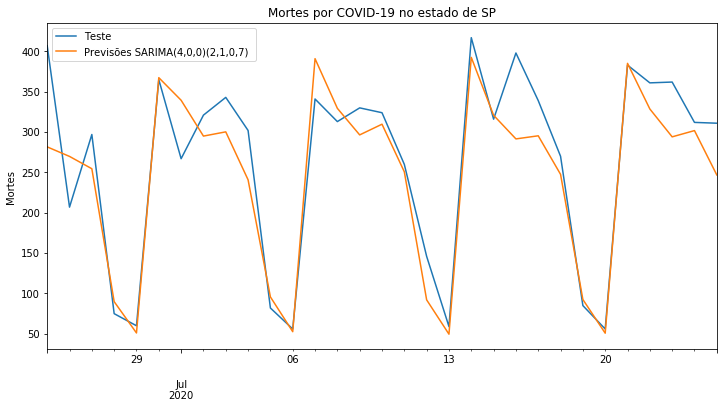

In [24]:
# Plot predictions against known values
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes '
xlabel=''

ax = teste['deaths'].plot(legend=True,figsize=(12,6),title=title, label='Teste')
previsões.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

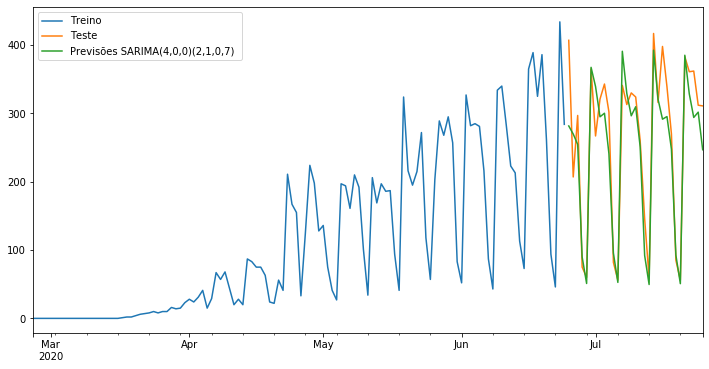

In [25]:
treino['deaths'].plot(legend=True, label='Treino')
teste['deaths'].plot(legend=True, label='Teste')
previsões.plot(legend=True, figsize=(12,6))

### Previsões para dados cujos tempos ainda não estão nas bases

In [37]:
modelo = SARIMAX(covidSP['deaths'],order=(4,0,0),seasonal_order=(2,1,0,7))
resultados = modelo.fit()
fcast = resultados.predict(len(covidSP),len(covidSP)+14,typ='levels').rename('Previsões SARIMA(4,0,0)(2,1,0,7)')

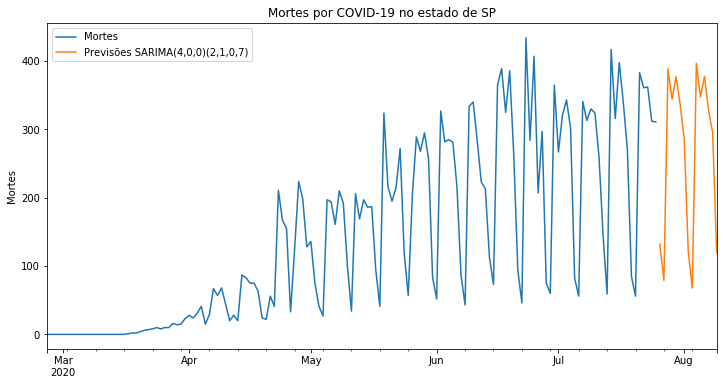

In [27]:
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes'
xlabel=''

ax = covidSP['deaths'].plot(legend=True,figsize=(12,6),title=title, label='Mortes')
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

**Exercício: É possível melhorar as previsões para os dados de PETR4 com o SARIMA sazonal?**

## Diagnóstico em modelos SARIMA

### Métricas

In [32]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(teste['deaths'], previsões)
print(f'EQM SARIMA(4,0,0)(2,1,0,7): {error:11.10}')

EQM SARIMA(4,0,0)(2,1,0,7):  2095.03279


In [33]:
from statsmodels.tools.eval_measures import rmse

error = rmse(teste['deaths'], previsões)
print(f'REQM SARIMA(4,0,0)(2,1,0,7): {error:11.10}')

REQM SARIMA(4,0,0)(2,1,0,7): 45.77152816


### Análise de resíduos

Considere inicialmente um modelo ARIMA

$$\phi(B) W_t = \theta(B) a_t$$ com $W_t = \Delta^d Z_t$ supondo que $a_t$ é um ruído branco.

Se o modelo for verdadeiro, então os erros verdadeiros $a_t = \theta^{-1}(B) \phi(B) W_t$ devem ser um ruído branco.

Uma análise equivalente poderia ser feita para modelos mais gerais SARIMA.

Quando o modelo é estimado, ou seja, quando são obtidos $\widehat{\phi}$ e $\widehat{\phi}$, as quantidades

$$\widehat{a}_t = \widehat{\theta}^{-1}(B) \widehat{\phi}(B) W_t$$

são chamadas de **resíduos**. Se o modelo for correto, eles devem ser aproximadamente não correlacionados.

Uma forma de analisar os resíduos ajustados é simplesmente considerar

$$r_t = Z_t - \widehat{Z}_t$$

e podemos analisar a distribuição, estatísticas descritivas, a autocorrelação dos resíduos e verificar se existe algum padrão nos mesmos.

Leitura adicional: https://otexts.com/fpp2/residuals.html

In [42]:
# Uma forma de obter os resíduos pelo ajuste do modelo

resíduos = resultados.resid

In [43]:
resíduos.describe()

count    151.000000
mean       7.862332
std       39.791391
min      -99.803076
25%      -11.536740
50%        3.228347
75%       27.442638
max      156.477289
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f47d97af890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f47d956da50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f47d956dc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f47d939fd50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f47d97afe50>],
 'means': []}

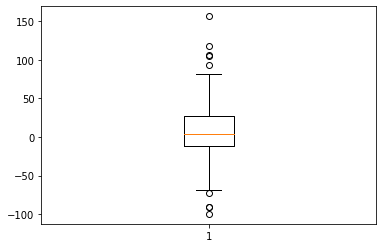

In [44]:
plt.boxplot(resíduos)

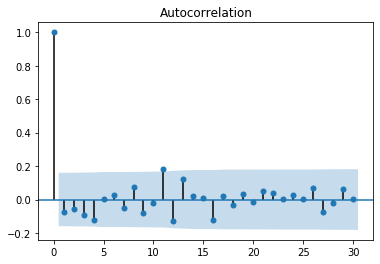

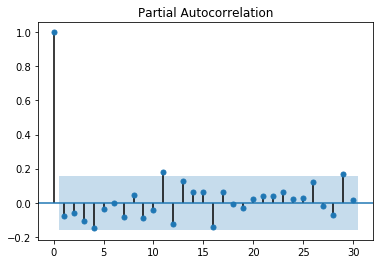

In [45]:
plot_acf(resíduos, lags=30)
plot_pacf(resíduos, lags=30)
plt.show()

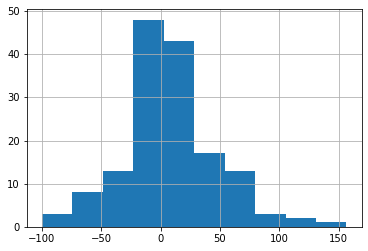

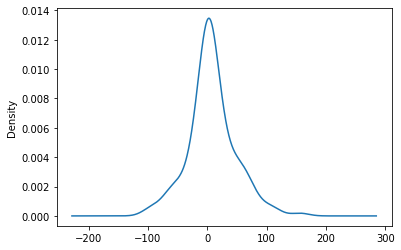

In [46]:
from matplotlib import pyplot


resíduos.hist()

pyplot.show()
resíduos.plot(kind='kde')
pyplot.show()

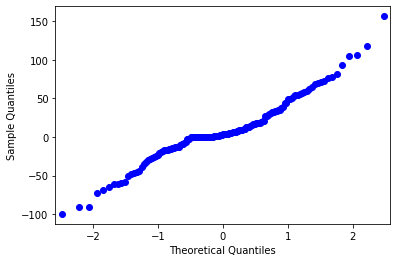

In [47]:
from statsmodels.graphics.gofplots import qqplot

qqplot(resíduos)
pyplot.show()

**Exercício: O que aconteceria com os resíduos se um modelo incorreto tivesse sido ajustado?**